In [ ]:
from modules2 import *
from torch.optim import Adam
from  tqdm.notebook import tqdm
import matplotlib.animation as animation
import imageio
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch. optim.lr_scheduler import ExponentialLR

In [2]:
batch_size = 256
dataset = torchvision.datasets.FashionMNIST(root="C:/Users/ericy/Downloads", train = True, download = True, transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Lambda(lambda t: (t * 2) - 1)
]))
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [3]:
device = "cuda:0"
#model = att_Unet( dims=((18, 28), (28, 56), (56, 112)),channels=1, time_dim = 200)
model = Unet(time_dim=200, dims=((18, 28), (28, 56), (56, 112)), channels=1)
model = model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
scheduler = ExponentialLR(optimizer, gamma=0.99)

In [4]:
time_steps = 200
S = schedule(time_steps, device)

In [ ]:
epochs = 200
L = []

for epoch in tqdm(range(epochs), desc="Epoch", position=0):
    for step, (batch, _) in enumerate(tqdm(loader, desc="Batch", position=1, leave=False)):
        optimizer.zero_grad()
        batch = batch.to(device)
        t = torch.randint(0, time_steps, (len(batch),), device=device).long()
        loss = S.loss(model, batch, t)
        loss.backward()
        optimizer.step()
        L.append(loss.detach().cpu())
        if step % 100 == 0:
            print("Epoch:", epoch, "Loss:", loss.item())

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 0 Loss: 0.44491779804229736
Epoch: 0 Loss: 0.05882278457283974
Epoch: 0 Loss: 0.04559669643640518


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 1 Loss: 0.05179493501782417
Epoch: 1 Loss: 0.04323099926114082
Epoch: 1 Loss: 0.04605076089501381


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 2 Loss: 0.03908570855855942


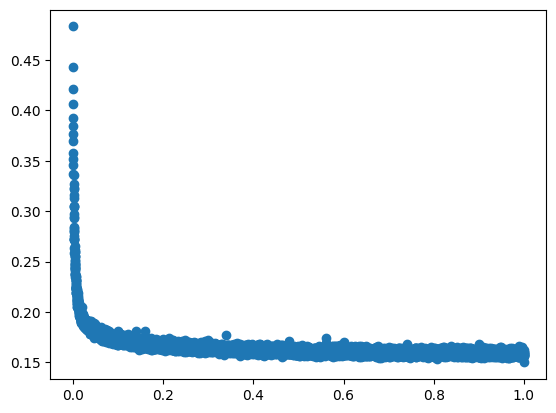

In [ ]:
plt.scatter(np.linspace(0,1,len(L)), L)

In [ ]:
M = np.squeeze(S.sample(model, device, time_steps),axis=3).astype(np.uint8)
imageio.mimwrite("output4.gif", M[::10], 'GIF')